# 데이터 전처리 및 주소 return 받기

In [ ]:
import os
list_ = os.listdir('sorted_data/128/Trajectory/')

import urllib.request, json
import pandas as pd
import os
import sys
import json

# 데이터를 
sorted_128 = []
    
for i in range(len(list_)):
    file_ = open('sorted_data/128/Trajectory/' + list_[i], 'r') 
    file = file_.readlines()
    file = file[6:]
    for j in range(len(file)):
        tmp = file[j].split(',')
        if j % 20 == 0:
            with urllib.request.urlopen("https://maps.googleapis.com/maps/api/geocode/json?latlng=" + tmp[0] + "," + tmp[1] + "&key=AIzaSyClbiBnOUKA_p-VzyF7R7cwdnQ1yHrHw&language=ko") as url:
                data = json.loads(url.read().decode())
            address = ''
            for k in range(10):
                try:
                    if len(tmp) < len(data['results'][i]['formatted_address']):
                        address = data['results'][i]['formatted_address']
                except IndexError:
                    pass
            sorted_128.append([tmp[0], tmp[1], tmp[-2], tmp[-1][:-1], address])
        else:
            sorted_128.append([tmp[0], tmp[1], tmp[-2], tmp[-1][:-1], 0])
df = pd.DataFrame(sorted_128)
df.to_csv('sorted_128.csv')

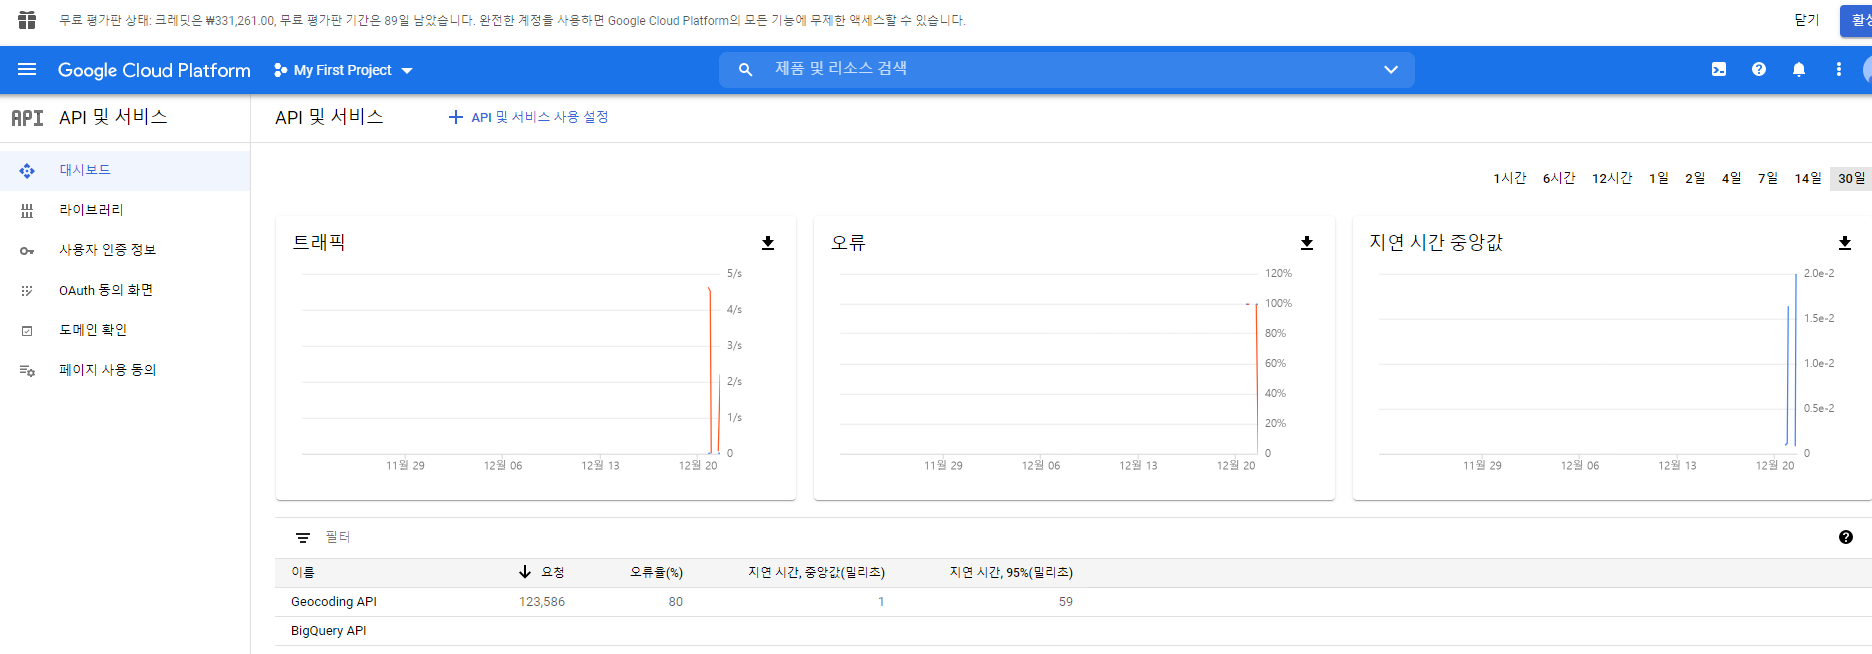

In [2]:
from IPython.display import Image
Image("cloud platform.png") # 수 많은 시도 끝에 데이터를 얻어냄

In [ ]:
import urllib.request, json
import pandas as pd
import os
import sys
import json

client_id = "65xw2v8rw33_NO3z"
client_secret = "PJrpJbOVjA"
a = []

for i in range(len(df)):
    if df['4'].iloc[i] != 0:
        encText = urllib.parse.quote(df['4'].iloc[i])
        data = "source=zh-CN&target=ko&text=" + encText
        url = "https://openapi.naver.com/v1/papago/n2mt"
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request, data=data.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            result_str = response_body.decode('utf-8') # type가 string이네

            result = json.loads(result_str) 
            address = result['message']['result']['translatedText']
            a.append(address)
        else:
            print("Error Code:" + rescode)
    else:
        a.append(0)
        
df.to_csv('sorted_128_100_hangeul.csv')